<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/Facial_Emotion_Recognition(vgg16)_gray%20scale%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 94% 73.0M/77.3M [00:01<00:00, 34.6MB/s]
100% 77.3M/77.3M [00:01<00:00, 42.3MB/s]
 90% 83.0M/92.0M [00:01<00:00, 43.0MB/s]
100% 92.0M/92.0M [00:01<00:00, 79.1MB/s]
 92% 89.0M/96.6M [00:03<00:00, 21.0MB/s]
100% 96.6M/96.6M [00:03<00:00, 33.0MB/s]
 26% 5.00M/19.3M [00:00<00:00, 26.7MB/s]
100% 19.3M/19.3M [00:00<00:00, 76.6MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 6.37MB/s]


In [4]:
!tar -zxvf fer2013.tar.gz

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
 

In [6]:
dataset_path = 'fer2013/fer2013.csv'
image_size=(48,48)
 
def load_fer2013():
    data = pd.read_csv(dataset_path)
    pixels = data['pixels'].tolist()
    width, height = 48, 48
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height)
        face = cv2.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    faces = np.expand_dims(faces, -1)
    emotions = pd.get_dummies(data['emotion']).as_matrix()
    return faces, emotions

def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x
 
faces, emotions = load_fer2013()
faces = preprocess_input(faces)
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.2,shuffle=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [7]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((28709, 48, 48, 1), (28709, 7), (7178, 48, 48, 1), (7178, 7))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


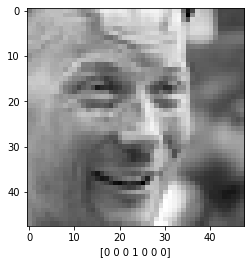

In [8]:
plt.imshow(xtrain[0].reshape(48,48),cmap=plt.cm.gray)

plt.xlabel(ytrain[0])
plt.show()

In [7]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
# parameters
batch_size = 32
input_shape = (48, 48, 1)
verbose = 1
num_classes = 7

# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [9]:
model =  Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 256)      

In [11]:

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary() ### replication of vgg 16 for gray scale image ###


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 128)       0         
____

In [13]:
num_epochs = 50

from keras.optimizers import SGD
opt = SGD(lr=0.0005)
model.compile( loss='categorical_crossentropy',metrics=['accuracy'],optimizer = opt)

model.fit_generator(data_generator.flow(xtrain, ytrain,batch_size),
                        steps_per_epoch=len(xtrain) / batch_size,
                        epochs=num_epochs, verbose=1, 
                        validation_data=(xtest,ytest))

Epoch 1/50
898/897 [==============================] - 24s 27ms/step - loss: 1.8012 - acc: 0.2515 - val_loss: 1.7786 - val_acc: 0.2625
Epoch 2/50
898/897 [==============================] - 23s 26ms/step - loss: 1.7764 - acc: 0.2585 - val_loss: 1.7656 - val_acc: 0.2736
Epoch 3/50
898/897 [==============================] - 23s 25ms/step - loss: 1.7652 - acc: 0.2728 - val_loss: 1.7573 - val_acc: 0.2814
Epoch 4/50
898/897 [==============================] - 23s 26ms/step - loss: 1.7586 - acc: 0.2760 - val_loss: 1.7461 - val_acc: 0.2980
Epoch 5/50
898/897 [==============================] - 23s 26ms/step - loss: 1.7517 - acc: 0.2870 - val_loss: 1.7358 - val_acc: 0.3105
Epoch 6/50
898/897 [==============================] - 23s 26ms/step - loss: 1.7410 - acc: 0.2928 - val_loss: 1.7253 - val_acc: 0.3110
Epoch 7/50
898/897 [==============================] - 23s 26ms/step - loss: 1.7336 - acc: 0.2985 - val_loss: 1.7138 - val_acc: 0.3225
Epoch 8/50
898/897 [==============================] - 23s 25ms